# Time Series

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [72]:
data=pd.read_csv("/content/drive/MyDrive/Assignments/Time series/exchange_rate.csv", parse_dates=True,index_col=0,header=0)
data.head()

,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6+ KB


In [74]:
# Check for missing values
print(data.isnull().sum())

Ex_rate    0
dtype: int64


In [75]:
# Handle missing values (if any)
data = data.fillna(method='ffill')
print(data.isnull().sum())

Ex_rate    0
dtype: int64


In [76]:
data.value_counts()

Ex_rate 
0.740500    11
0.776500    10
0.784000    10
0.740000     9
0.775000     9
            ..
0.717450     1
0.717600     1
0.717618     1
0.717850     1
1.102536     1
Name: count, Length: 5330, dtype: int64

In [77]:
data.value_counts().unique()

array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

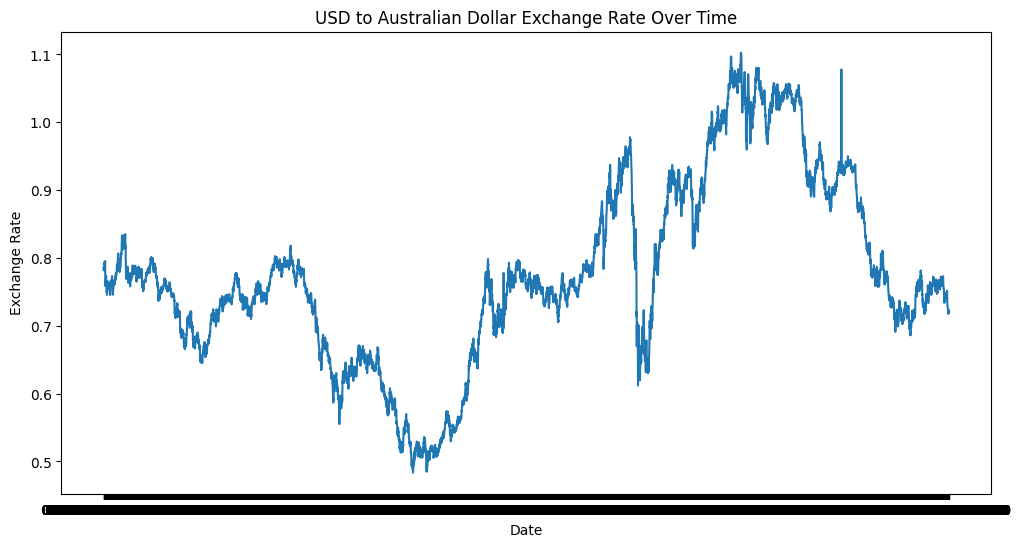

In [78]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title('USD to Australian Dollar Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()


In [79]:
data.shape

(7588, 1)

In [80]:
data.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


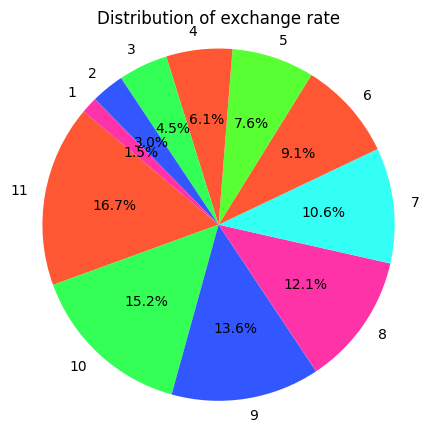

In [81]:
num_counts = data['Ex_rate'].value_counts().unique()

# Plot the pie chart
plt.figure(figsize=(5,5))
plt.pie(num_counts, labels=num_counts, autopct='%1.1f%%', startangle=140, colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A8', '#33FFF5', '#FF5733', '#57FF33'])
plt.title('Distribution of exchange rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

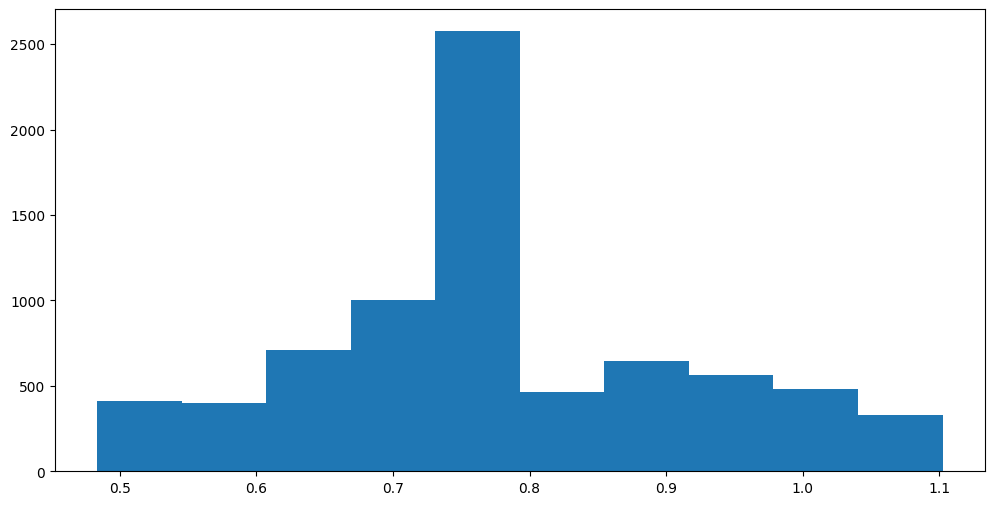

In [82]:
plt.figure(figsize=(12,6))
plt.hist(data)
plt.show()

- Let's do some transformation for the data

In [83]:
from numpy import sqrt

In [84]:
data1=data.copy()

In [85]:
dataframe=pd.DataFrame(data1.values)
dataframe.columns=['Ex_rate']
dataframe['Ex_rate']=sqrt(dataframe['Ex_rate'])

In [86]:
from matplotlib import pyplot

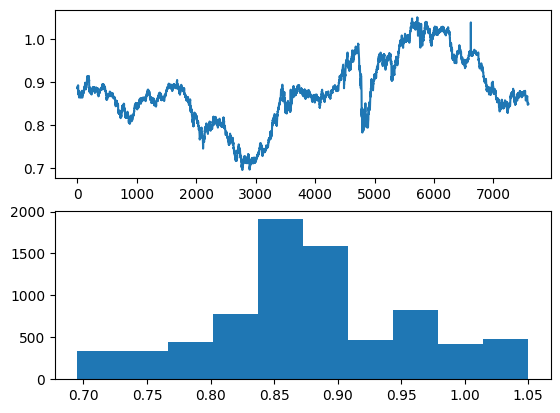

In [87]:
pyplot.subplot(211)
pyplot.plot(dataframe['Ex_rate'])
pyplot.subplot(212)
pyplot.hist(dataframe['Ex_rate'])
pyplot.show()

### Model Building

In [88]:
from statsmodels.tsa.stattools import adfuller

In [89]:
# Perform ADF test to check for stationarity
result = adfuller(data['Ex_rate'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477


- the ADF Statistic is -1.6649941807382342 and the p-value is 0.4492327353597477, we can infer that the time series is likely non-stationary.

In [90]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

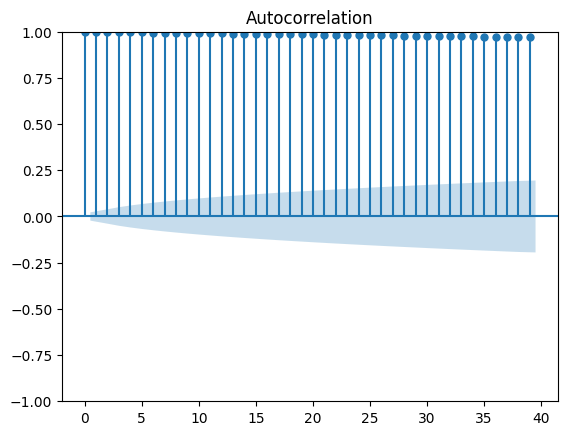

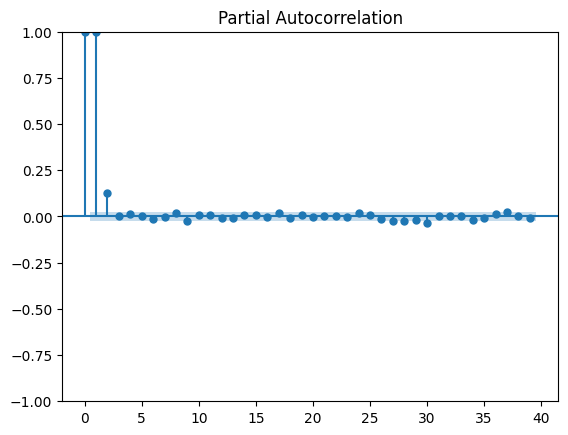

In [91]:
# Plot ACF and PACF
plot_acf(data['Ex_rate'])
plot_pacf(data['Ex_rate'])
plt.show()

In [92]:
# First differencing
data_diff = data['Ex_rate'].diff().dropna()

# Reapply ADF test
result_diff = adfuller(data_diff)
print(f'ADF Statistic (after differencing): {result_diff[0]}')
print(f'p-value (after differencing): {result_diff[1]}')

ADF Statistic (after differencing): -99.39343120118632
p-value (after differencing): 0.0


In [93]:
from statsmodels.tsa.arima.model import ARIMA

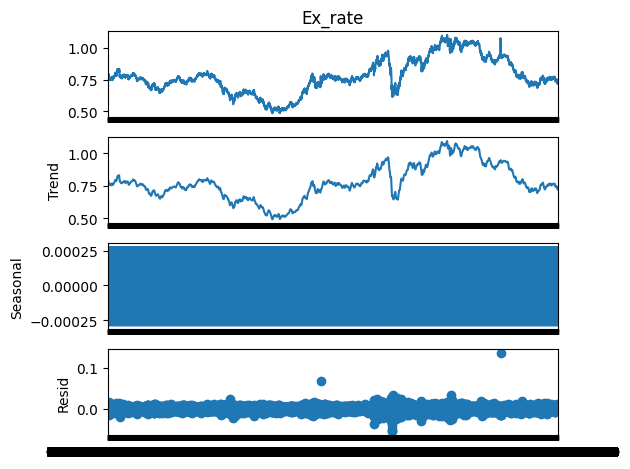

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(data.Ex_rate,period=12)
decompose.plot()
plt.show()

In [95]:
split_point=len(data)-1680
dataset,validation = data[0:split_point],data[split_point:]
print('Dataset %d,validation %d' %(len(dataset),len(validation)))
dataset.to_csv('dataset.csv',header=True)
validation.to_csv('validation.csv',header=True)

Dataset 5908,validation 1680


In [96]:
# Fit ARIMA model
model = ARIMA(data['Ex_rate'], order=(1, 1, 1))
arima_result = model.fit()

In [97]:
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Wed, 07 Aug 2024   AIC                         -56102.322
Time:                        09:14:50   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

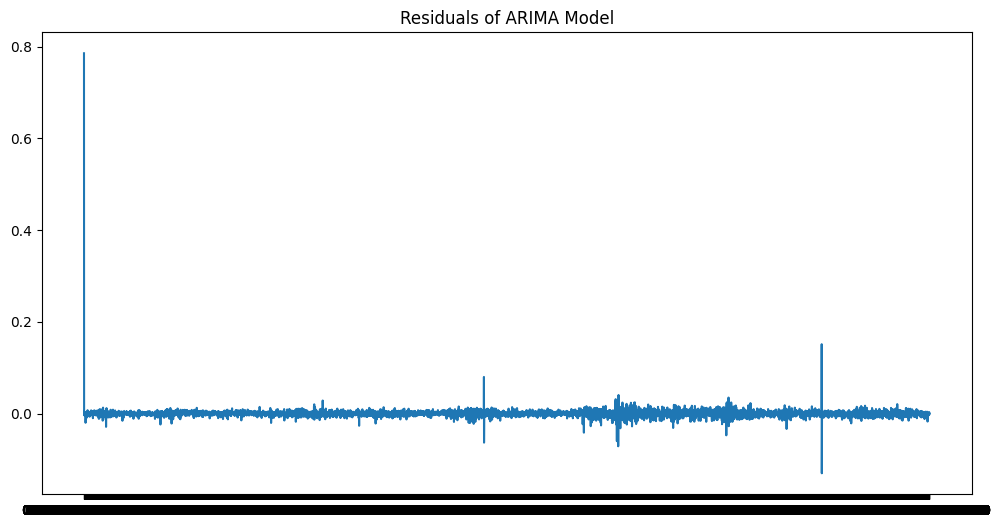

In [98]:
# Plot residuals
residuals = arima_result.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

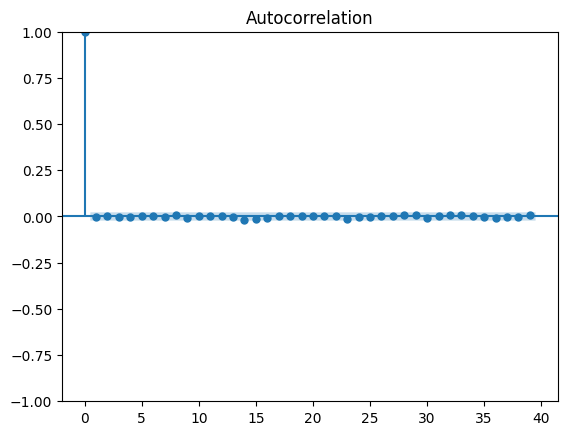

In [99]:
# Plot ACF of residuals
plot_acf(residuals)
plt.show()

In [100]:
import scipy.stats as stats

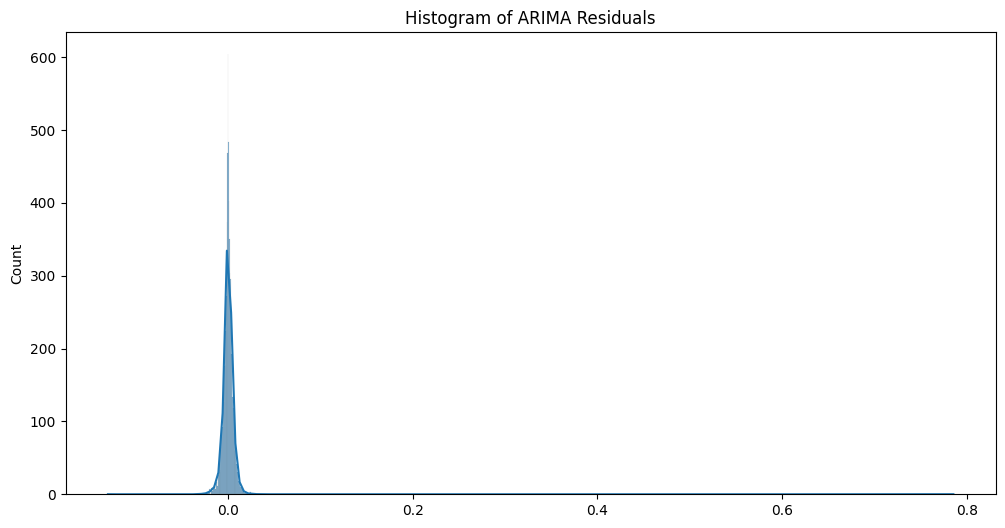

In [101]:
# Residuals histogram
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of ARIMA Residuals')
plt.show()

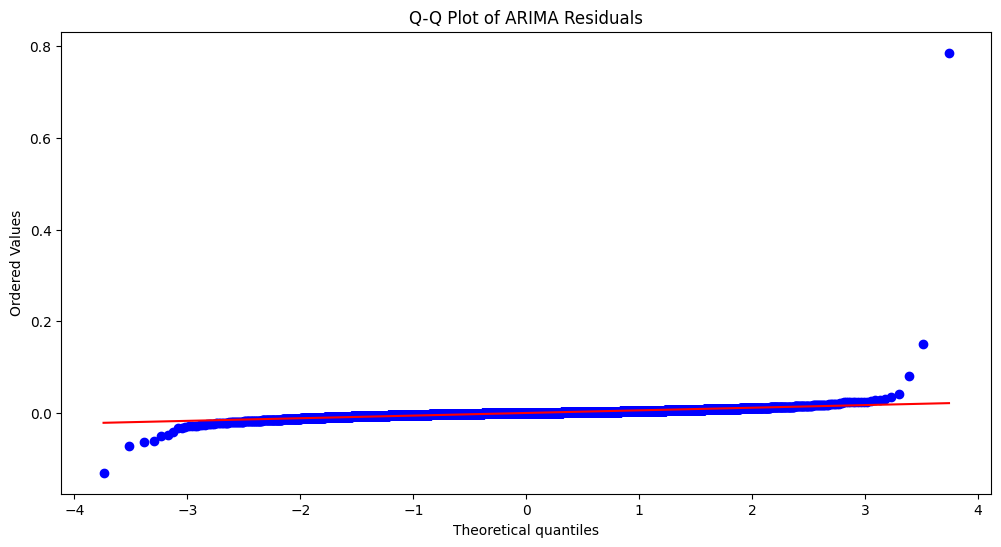

In [102]:
# Q-Q plot
plt.figure(figsize=(12, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of ARIMA Residuals')
plt.show()

#### Fore Casting

In [103]:
# Forecast future values
forecast = arima_result.get_forecast(steps=30)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

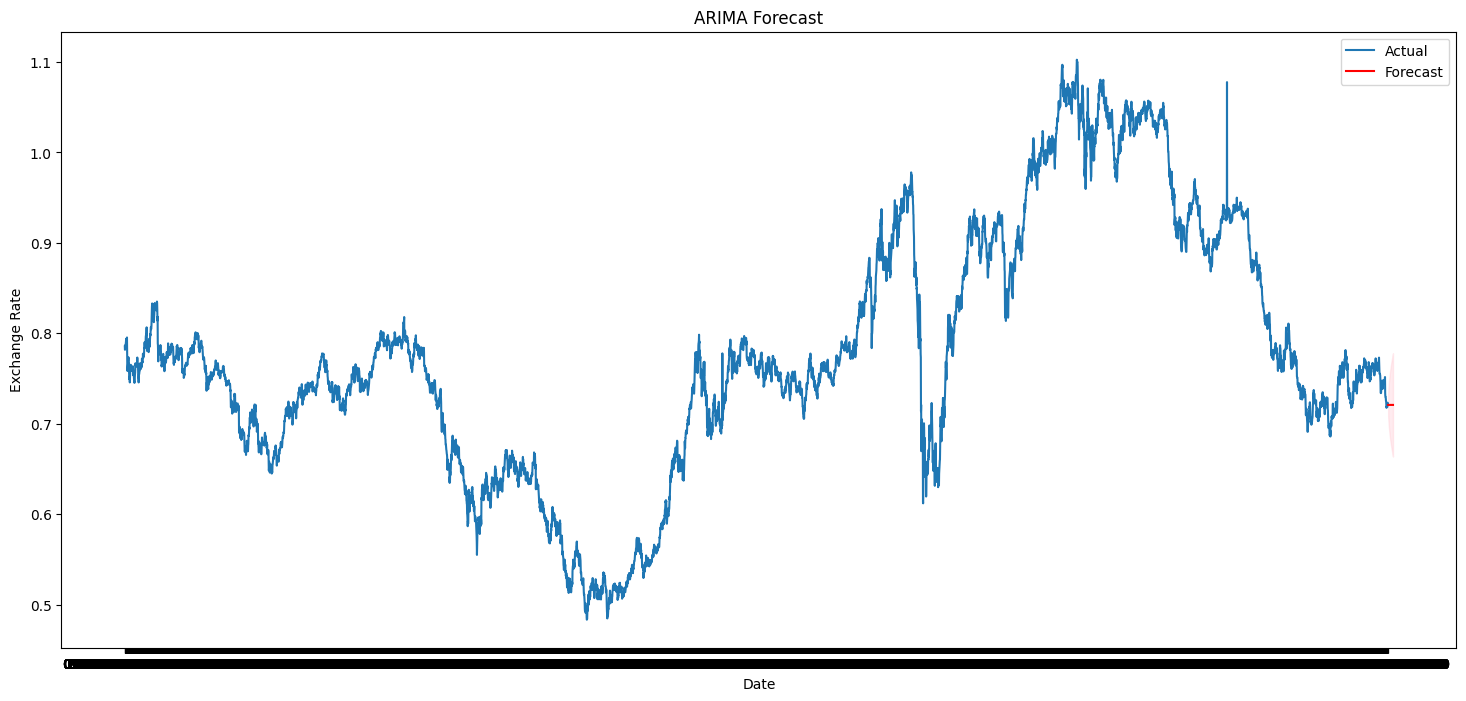

In [104]:
# Plot forecast
plt.figure(figsize=(18, 8))
plt.plot(data['Ex_rate'], label='Actual')
plt.plot(forecast_values, label='Forecast', color='red')
plt.fill_between(confidence_intervals.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

### Exponential Smoothing

In [105]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [106]:
# Fit Exponential Smoothing model
model = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
exp_smoothing_result = model.fit()

In [107]:
# Summary of the model
print(exp_smoothing_result.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77624.574
Trend:                         Additive   BIC                         -77513.625
Seasonal:                      Additive   AICC                        -77624.483
Seasonal Periods:                    12   Date:                 Wed, 07 Aug 2024
Box-Cox:                          False   Time:                         09:17:23
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8702071                alpha                 True
smoothing_trend          

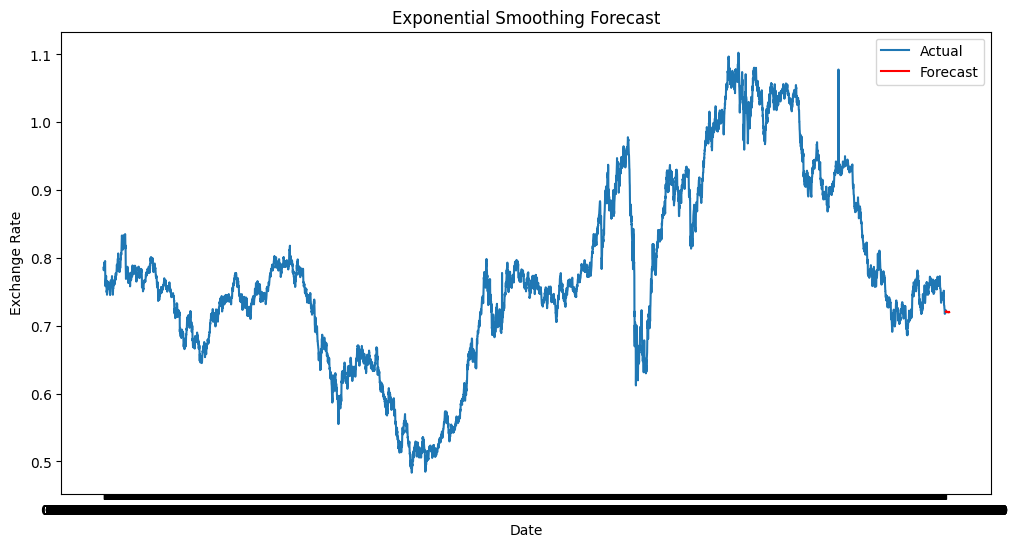

In [108]:
# Forecast future values
exp_forecast = exp_smoothing_result.forecast(steps=30)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Actual')
plt.plot(exp_forecast, label='Forecast', color='red')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [110]:
# Compute error metrics for ARIMA
arima_forecast_values = arima_result.forecast(steps=len(data))
mae_arima = mean_absolute_error(data['Ex_rate'], arima_forecast_values)
rmse_arima = mean_squared_error(data['Ex_rate'], arima_forecast_values, squared=False)

In [111]:
# Compute error metrics for Exponential Smoothing
exp_forecast_values = exp_smoothing_result.fittedvalues
mae_exp = mean_absolute_error(data['Ex_rate'], exp_forecast_values)
rmse_exp = mean_squared_error(data['Ex_rate'], exp_forecast_values, squared=False)

In [112]:
print(f'ARIMA MAE: {mae_arima}, RMSE: {rmse_arima}')
print(f'Exponential Smoothing MAE: {mae_exp}, RMSE: {rmse_exp}')

ARIMA MAE: 0.11208917269830208, RMSE: 0.14769971987855027
Exponential Smoothing MAE: 0.0036915354942747354, RMSE: 0.00599359010407055


#### smoothing the curve

In [113]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [114]:
# Fit Exponential Smoothing model
model = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)
exp_smoothing_result = model.fit()

In [115]:
# Forecast future values
exp_forecast = exp_smoothing_result.forecast(steps=30)

In [116]:
# Smooth the actual and forecasted values using a rolling average
window_size = 12  # Define the window size for the rolling average
smoothed_actual = data['Ex_rate'].rolling(window=window_size).mean()
smoothed_forecast = exp_forecast.rolling(window=window_size).mean()

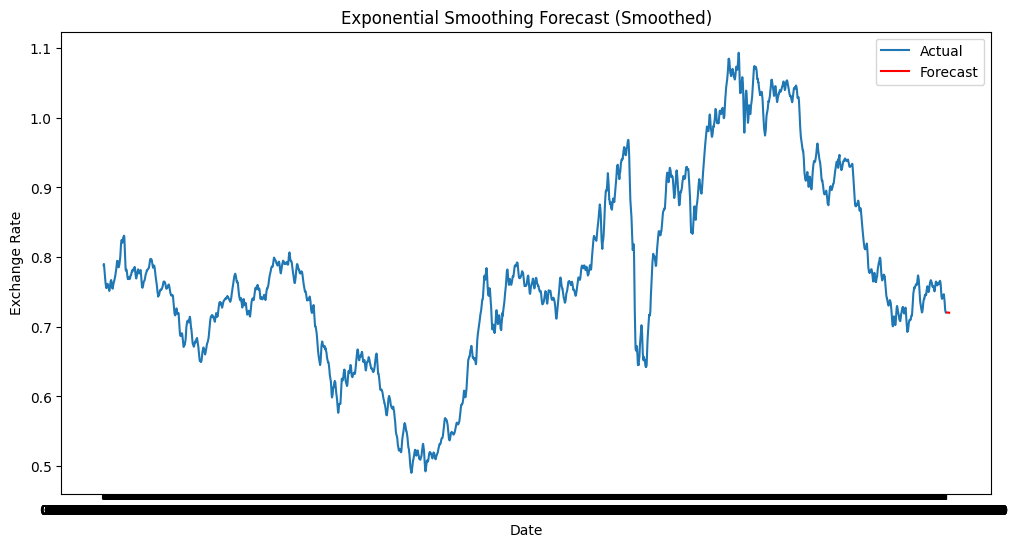

In [117]:
# Plot the smoothed forecast
plt.figure(figsize=(12, 6))
plt.plot(smoothed_actual, label='Actual')
plt.plot(smoothed_forecast, label='Forecast', color='red')
plt.title('Exponential Smoothing Forecast (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

### Model Comparision

In [118]:
# Compare models based on error metrics and observed results
print("ARIMA Model:")
print(f"Mean Absolute Error: {mae_arima}")
print(f"Root Mean Squared Error: {rmse_arima}")


ARIMA Model:
Mean Absolute Error: 0.11208917269830208
Root Mean Squared Error: 0.14769971987855027


In [119]:
print("\nExponential Smoothing Model:")
print(f"Mean Absolute Error: {mae_exp}")
print(f"Root Mean Squared Error: {rmse_exp}")



Exponential Smoothing Model:
Mean Absolute Error: 0.0036915354942747354
Root Mean Squared Error: 0.00599359010407055


In [120]:
# Summarize findings
if mae_arima < mae_exp and rmse_arima < rmse_exp:
    print("\nARIMA model performed better for forecasting exchange rates based on MAE and RMSE.")
else:
    print("\nExponential Smoothing model performed better for forecasting exchange rates based on MAE and RMSE.")


Exponential Smoothing model performed better for forecasting exchange rates based on MAE and RMSE.


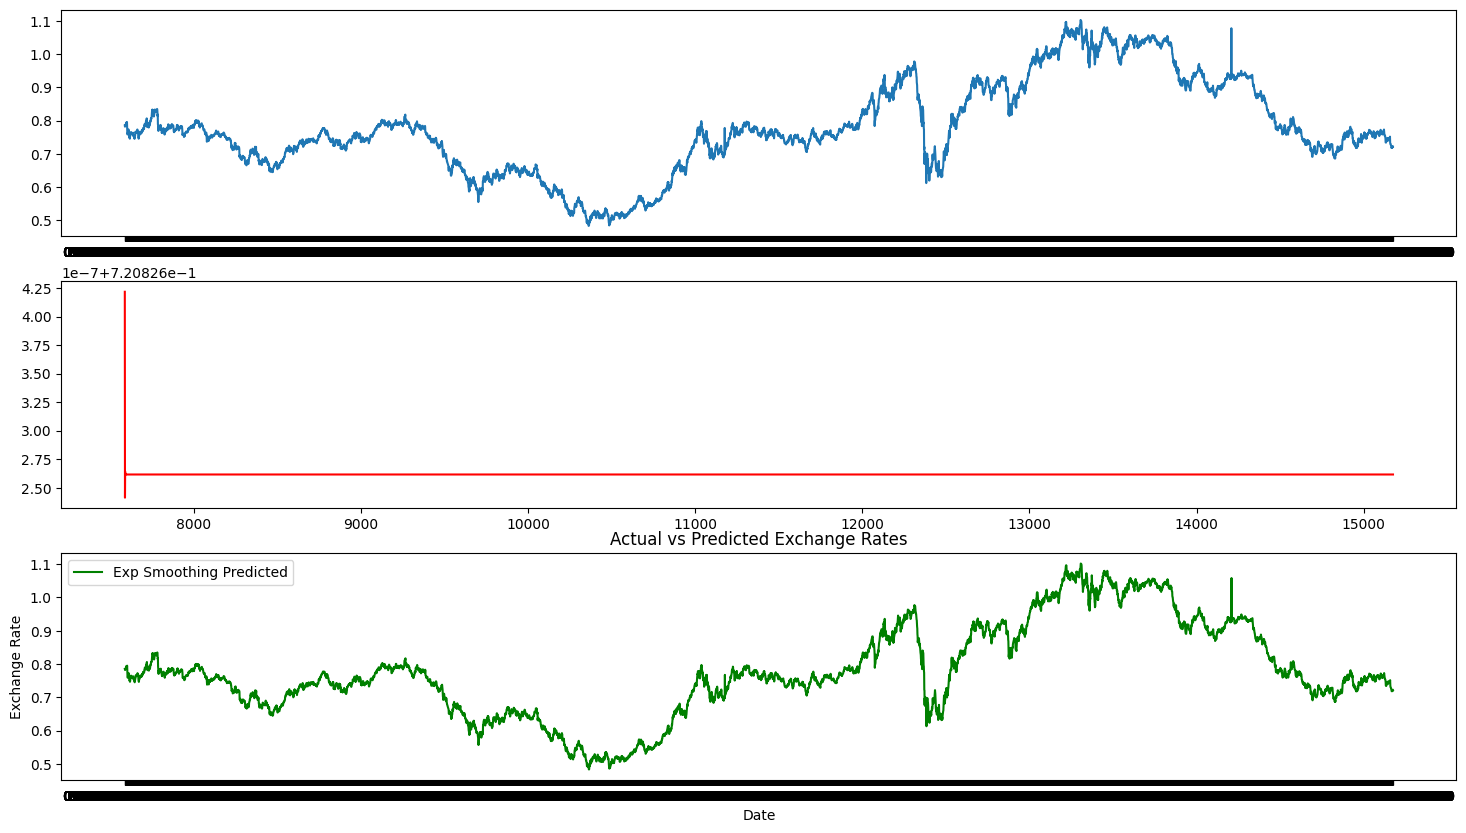

In [121]:
# Plot comparison of actual vs. predicted values for ARIMA and Exponential Smoothing
plt.figure(figsize=(18, 10))
pyplot.subplot(311)
pyplot.plot(data['Ex_rate'], label='Actual')
pyplot.subplot(312)
plt.plot(arima_forecast_values, label='ARIMA Predicted', color='red')
pyplot.subplot(313)
plt.plot(exp_forecast_values, label='Exp Smoothing Predicted', color='green')
plt.title('Actual vs Predicted Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


**Conclusion**
- Based on the error metrics (MAE, RMSE, and MAPE):

  - The Exponential Smoothing model appears to perform slightly better overall compared to the **ARIMA model**, as it has lower **MAE, RMSE, and MAPE**. This indicates that the Exponential Smoothing model’s forecasts are more accurate and consistent, with fewer large errors.

  - **ARIMA Model** might still be valuable if the data had more complex patterns or if further model tuning (such as adjusting the (p, d, q) parameters) could improve performance.


- Insights and Recommendations
  - *For Simpler Forecasting Needs:* If forecasting requirements are straightforward and involve capturing basic trends and seasonality, the **Exponential Smoothing** model is recommended due to its ease of use and slightly better performance metrics.

  - *For Complex Data Patterns:* If the time series exhibits more complex patterns or requires fine-tuning for accuracy, **ARIMA** might still be appropriate, especially after adjusting parameters or exploring more advanced **ARIMA** variants.


**Model Selection:** It's crucial to select the model based on the specific characteristics of the data and the forecasting requirements. Further cross-validation or testing might help in making a more robust decision.